In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training logs
# logs = pd.read_csv('./ppo/logs/progress.csv')

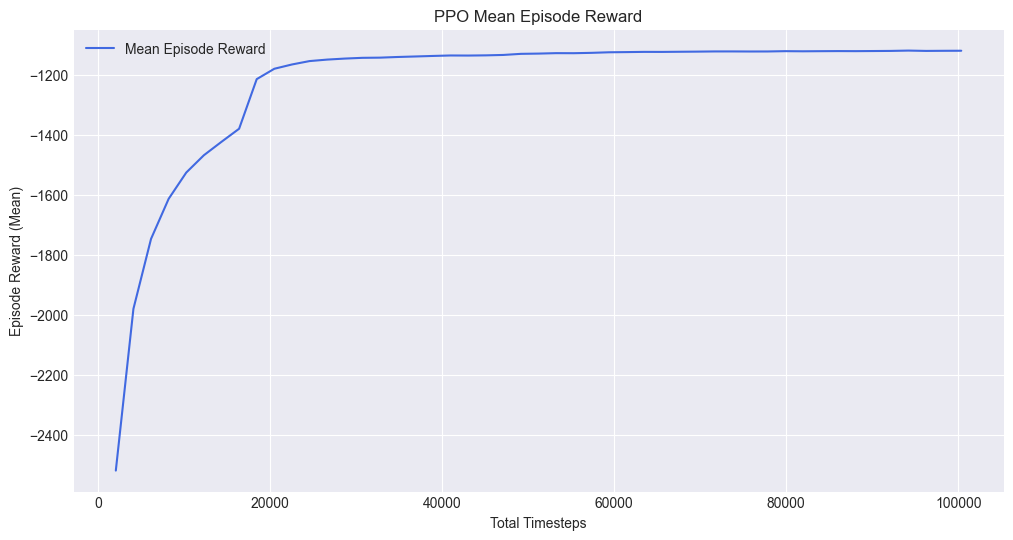

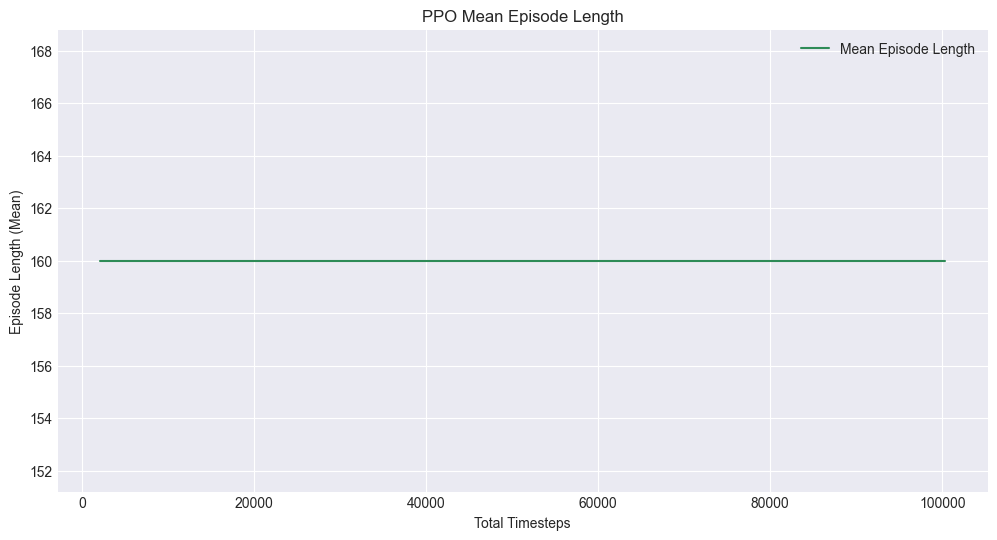

In [69]:
# Plot: Mean Episode Reward vs. Timesteps
plt.figure(figsize=(12, 6))
plt.plot(logs['time/total_timesteps'], logs['rollout/ep_rew_mean'], label='Mean Episode Reward', color='royalblue')
plt.xlabel('Total Timesteps')
plt.ylabel('Episode Reward (Mean)')
plt.title('PPO Mean Episode Reward')
plt.grid(True)
plt.legend()
plt.show()

# Plot: Episode Length vs. Timesteps
plt.figure(figsize=(12, 6))
plt.plot(logs['time/total_timesteps'], logs['rollout/ep_len_mean'], label='Mean Episode Length', color='seagreen')
plt.xlabel('Total Timesteps')
plt.ylabel('Episode Length (Mean)')
plt.title('PPO Mean Episode Length')
plt.grid(True)
plt.legend()
plt.show()

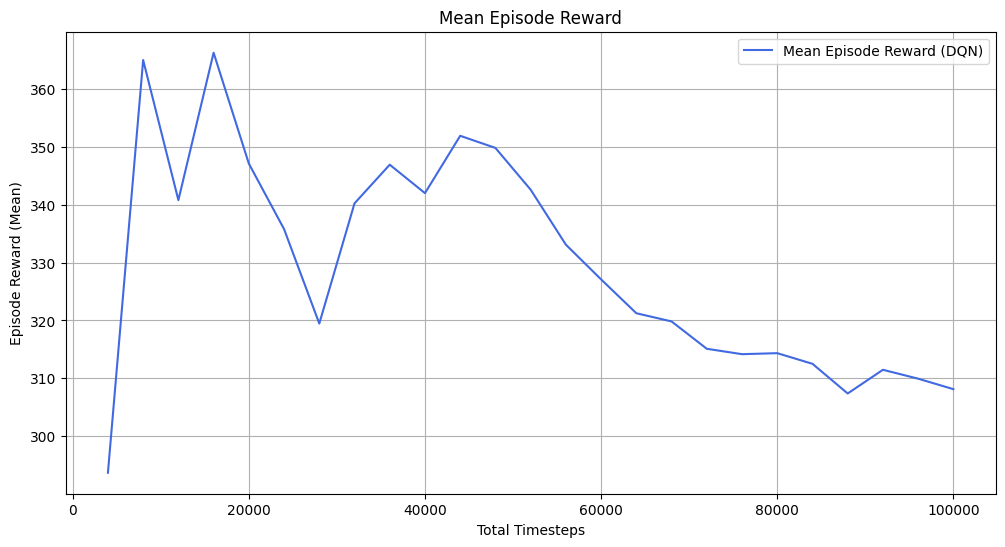

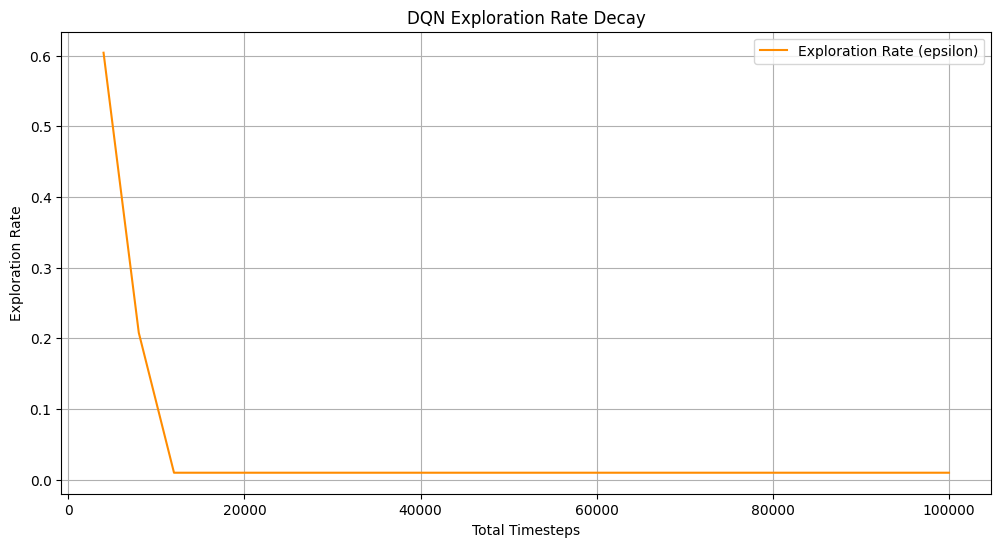

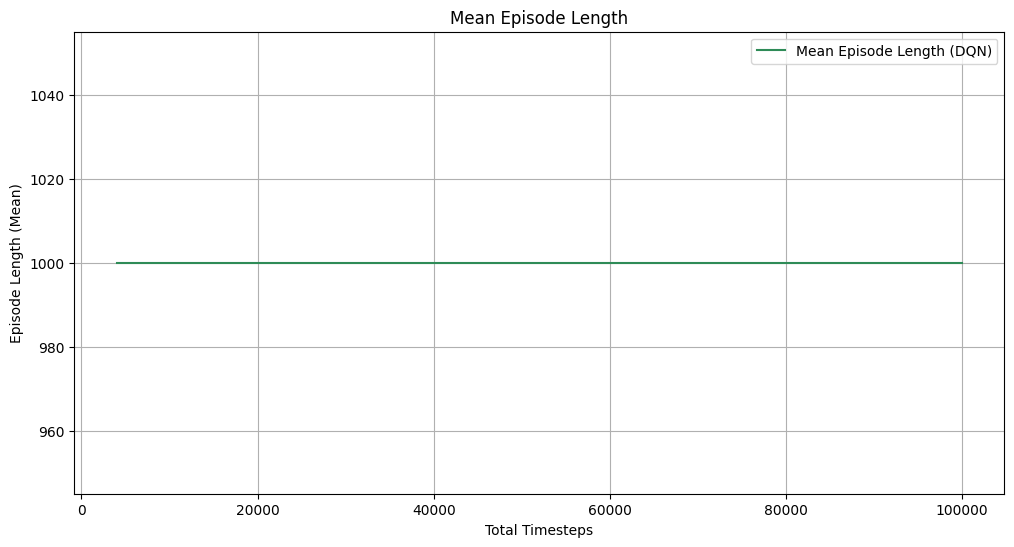

In [4]:
# Filter for first 40,000 timesteps
logs_dqn =  pd.read_csv('./dqn/logs/progress.csv')
# logs_ppo = pd.read_csv('./ppo/logs/progress.csv')
# logs_a2c = pd.read_csv('./a2c/logs/progress.csv')

# Plot: Mean Episode Reward vs. Timesteps
plt.figure(figsize=(12, 6))
plt.plot(logs_dqn['time/total_timesteps'], logs_dqn['rollout/ep_rew_mean'], label='Mean Episode Reward (DQN)', color='royalblue')
# plt.plot(logs_ppo['time/total_timesteps'], logs_ppo['rollout/ep_rew_mean'], label='Mean Episode Reward (PPO)', color='crimson')
# plt.plot(logs_a2c['time/total_timesteps'], logs_a2c['rollout/ep_rew_mean'], label='Mean Episode Reward (A2C)', color='gold')
plt.xlabel('Total Timesteps')
plt.ylabel('Episode Reward (Mean)')
plt.title('Mean Episode Reward')
plt.grid(True)
plt.legend()
plt.show()

# Plot: Exploration Rate vs. Timesteps
plt.figure(figsize=(12, 6))
plt.plot(logs_dqn['time/total_timesteps'], logs_dqn['rollout/exploration_rate'], label='Exploration Rate (epsilon)', color='darkorange')
plt.xlabel('Total Timesteps')
plt.ylabel('Exploration Rate')
plt.title('DQN Exploration Rate Decay')
plt.grid(True)
plt.legend()
plt.show()

# Plot: Episode Length vs. Timesteps
plt.figure(figsize=(12, 6))
plt.plot(logs_dqn['time/total_timesteps'], logs_dqn['rollout/ep_len_mean'], label='Mean Episode Length (DQN)', color='seagreen')
# plt.plot(logs_ppo['time/total_timesteps'], logs_ppo['rollout/ep_len_mean'], label='Mean Episode Length (PPO)', color='darkviolet')
# plt.plot(logs_a2c['time/total_timesteps'], logs_a2c['rollout/ep_len_mean'], label='Mean Episode Length (A2C)', color='darkred')
plt.xlabel('Total Timesteps')
plt.ylabel('Episode Length (Mean)')
plt.title('Mean Episode Length')
plt.grid(True)
plt.legend()
plt.show()


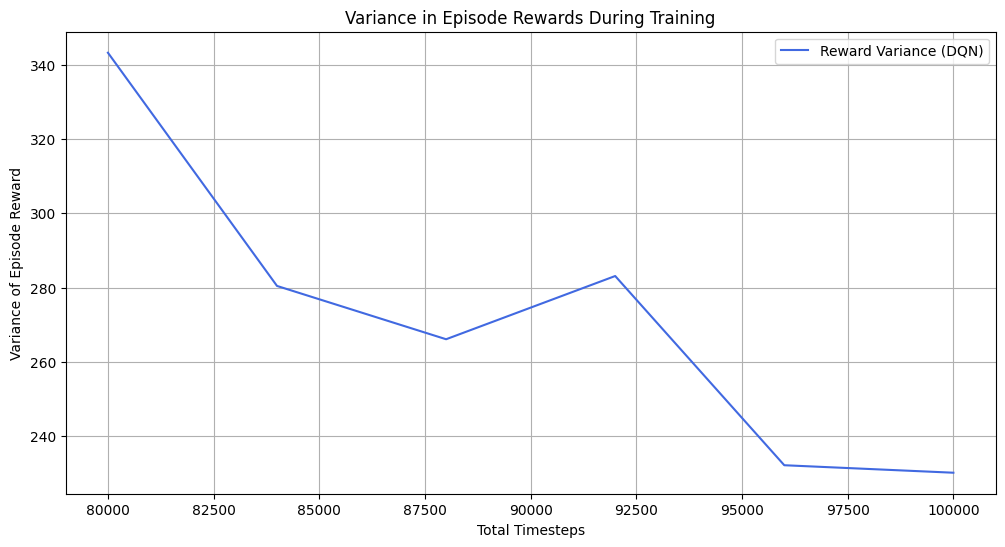

In [5]:
# Convert logs to DataFrames if they aren't already
logs_dqn_df = pd.DataFrame(logs_dqn)
# logs_ppo_df = pd.DataFrame(logs_ppo)
# logs_a2c_df = pd.DataFrame(logs_a2c)

# Calculate rolling variance (optional: adjust window size)
window_size = 20
var_dqn = logs_dqn_df['rollout/ep_rew_mean'].rolling(window=window_size).var()
# var_ppo = logs_ppo_df['rollout/ep_rew_mean'].rolling(window=window_size).var()
# var_a2c = logs_a2c_df['rollout/ep_rew_mean'].rolling(window=window_size).var()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(logs_dqn_df['time/total_timesteps'], var_dqn, label='Reward Variance (DQN)', color='royalblue')
# plt.plot(logs_ppo_df['time/total_timesteps'], var_ppo, label='Reward Variance (PPO)', color='crimson')
# plt.plot(logs_a2c_df['time/total_timesteps'], var_a2c, label='Reward Variance (A2C)', color='gold')
plt.xlabel('Total Timesteps')
plt.ylabel('Variance of Episode Reward')
plt.title('Variance in Episode Rewards During Training')
plt.grid(True)
plt.legend()
plt.show()


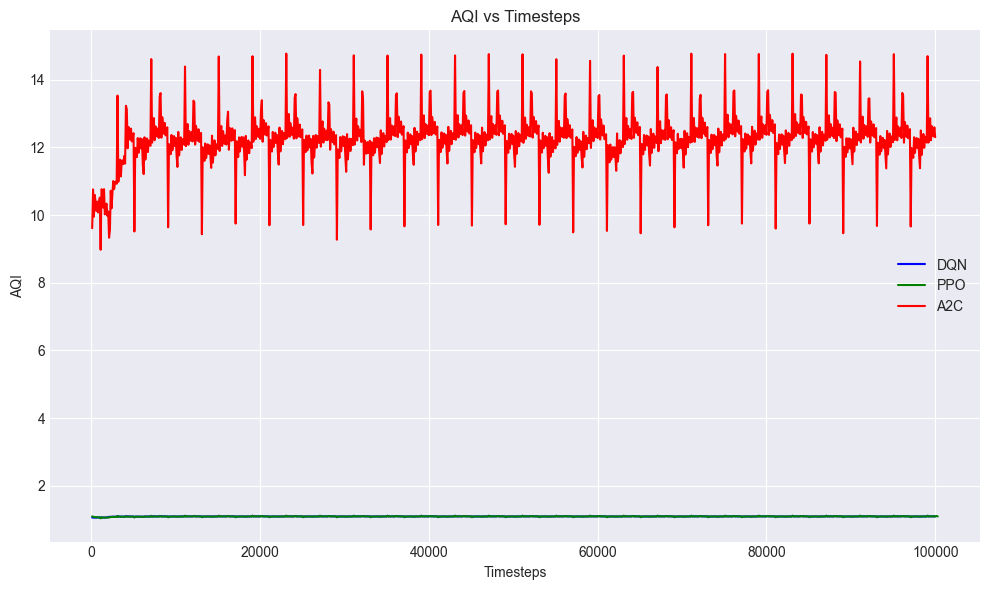

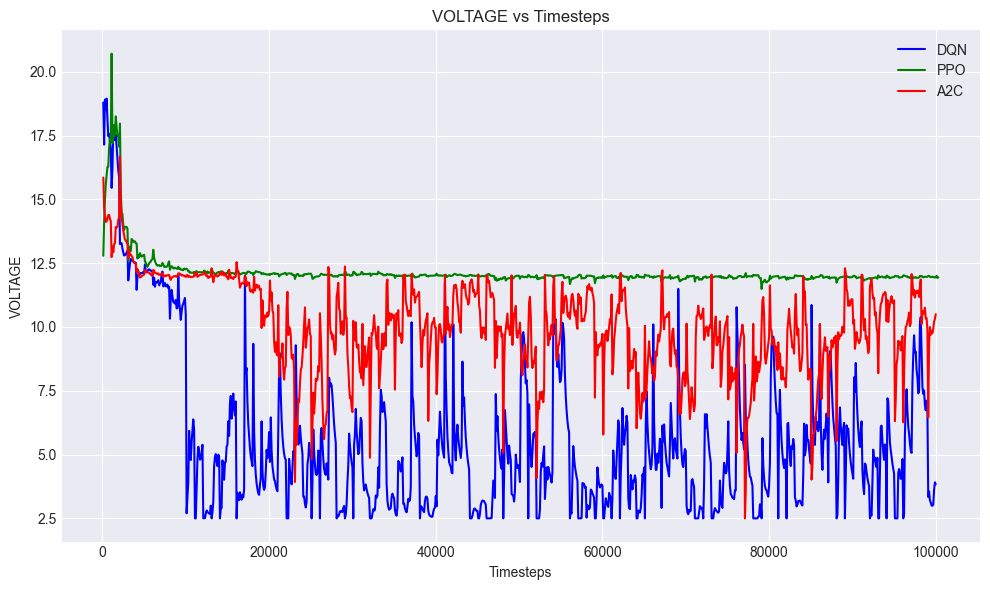

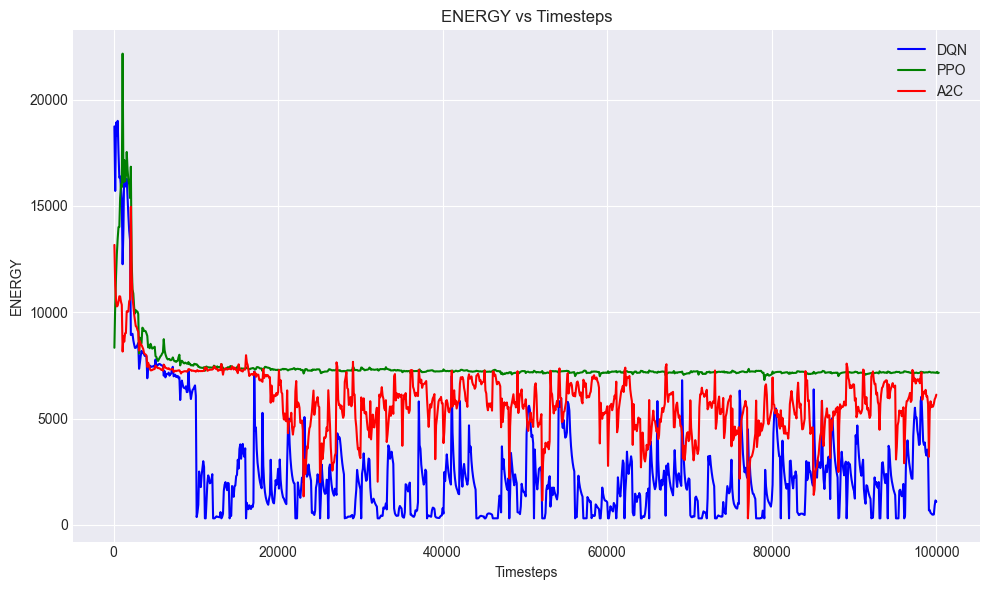

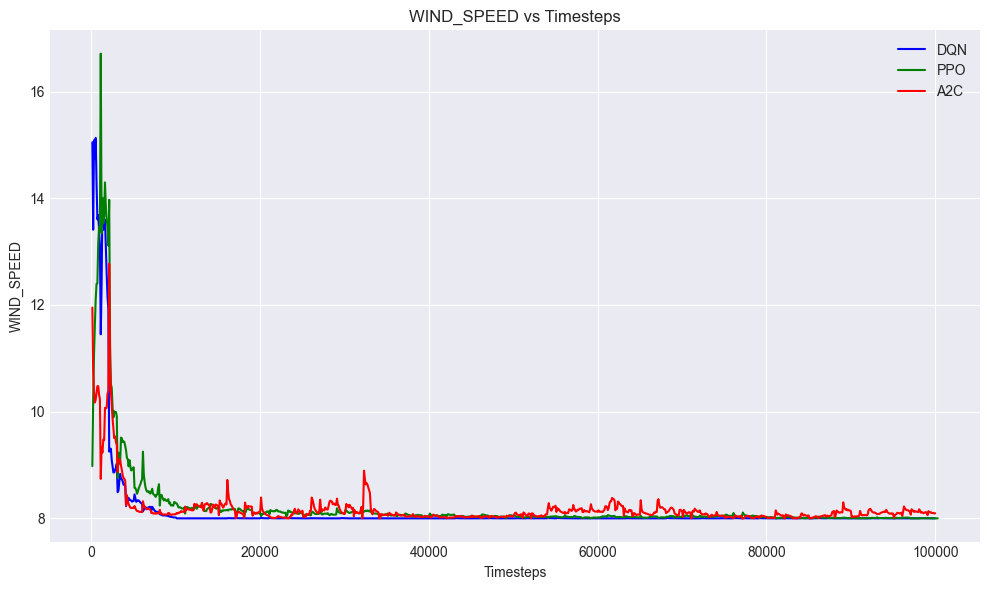

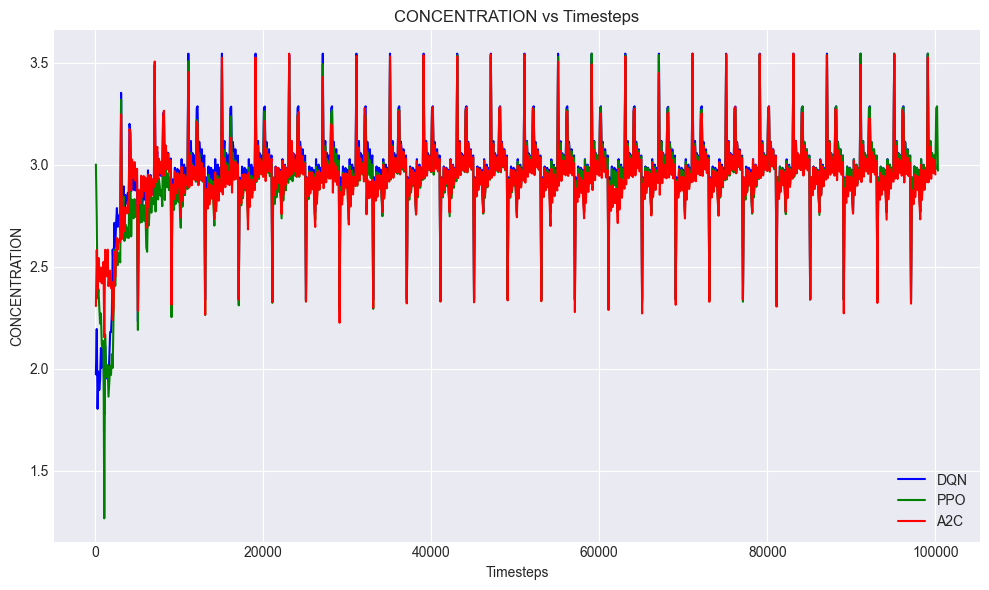

In [59]:
# Load the data
metrics_dqn = pd.read_csv('./dqn/train/training_metrics.csv')
metrics_ppo = pd.read_csv('./ppo/train/training_metrics.csv')
metrics_a2c = pd.read_csv('./a2c/train/training_metrics.csv')

# Define the metrics to plot
metrics = ['aqi', 'voltage', 'energy', 'wind_speed', 'concentration']

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Create a plot for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.plot(metrics_dqn['timestep'], metrics_dqn[metric], label='DQN', color='blue')
    plt.plot(metrics_ppo['timestep'], metrics_ppo[metric], label='PPO', color='green')
    plt.plot(metrics_a2c['timestep'], metrics_a2c[metric], label='A2C', color='red')
    
    plt.title(f'{metric.upper()} vs Timesteps')
    plt.xlabel('Timesteps')
    plt.ylabel(metric.upper())
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [7]:

import sys
import os
from stable_baselines3 import PPO, DQN, A2C
from simulated.environment import FanControlGymEnv
import time
from simulated.physics import FanControlEnv
import matplotlib.pyplot as plt
import numpy as np

In [10]:

# 1. Load Environment and Model
fan_env = FanControlEnv()
env = FanControlGymEnv(fan_env=fan_env)

In [11]:
CHECKPOINT_DIR_DQN = './dqn/train'

In [ ]:
aqi_range = np.linspace(1.0, 5.0, 20)
speed_range = np.linspace(0.0, 1.0, 20)
action_grid = np.zeros((20, 20))

In [15]:
def normalize_energy(fan_speed, fan_env):
    rpm = fan_speed * fan_env.max_rpm
    load_factor = min(rpm / fan_env.max_rpm, 0.95)
    current = fan_env.no_load_current + (fan_env.stall_current - fan_env.no_load_current) * (1 - load_factor)
    power = fan_env.voltage * current
    max_power = fan_env.stall_current * fan_env.voltage
    return min(power / max_power, 1.0)


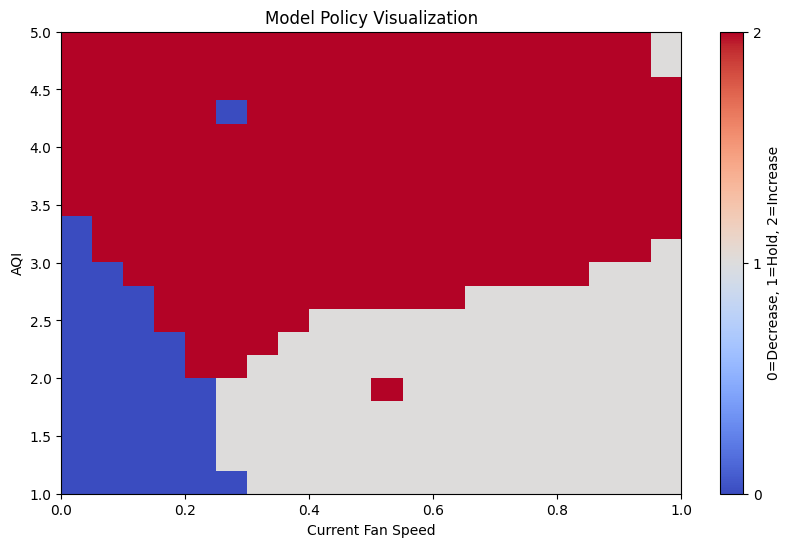

In [16]:
'''
Test with trained model
This script will load the trained model and run it in the environment to see how it performs.
'''

# model_ppo = PPO.load(f"{CHECKPOINT_DIR_PPO}/best_model_100000")  # Path to your saved model
model_dqn = DQN.load(f"{CHECKPOINT_DIR_DQN}/model_100000")  # Path to your saved model
# model_a2c = A2C.load(f"{CHECKPOINT_DIR_A2C}/best_model_100000")  # Path to your saved model

for i, aqi in enumerate(aqi_range):
    for j, speed in enumerate(speed_range):
        normalized_energy = normalize_energy(speed, fan_env)
        obs = np.array([aqi, speed, normalized_energy], dtype=np.float32)
        action, _ = model_dqn.predict(obs)
        action_grid[i, j] = action

plt.figure(figsize=(10,6))
plt.imshow(action_grid, extent=[0,1,1,5], aspect='auto', cmap='coolwarm')
plt.colorbar(ticks=[0,1,2], label='0=Decrease, 1=Hold, 2=Increase')
plt.xlabel('Current Fan Speed')
plt.ylabel('AQI')
plt.title('Model Policy Visualization')
plt.show()

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO, A2C, DQN

# Load models
model_ppo = PPO.load(f"{CHECKPOINT_DIR_PPO}/best_model_100000")
model_dqn = DQN.load(f"{CHECKPOINT_DIR_DQN}/best_model_100000")
model_a2c = A2C.load(f"{CHECKPOINT_DIR_A2C}/best_model_100000")

/var/folders/m9/m7xl4h0s4dxcq7r_gtrcb8m80000gn/T/ipykernel_10167/3318071851.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  action_grid_dqn[i, j] = int(a_dqn)
/var/folders/m9/m7xl4h0s4dxcq7r_gtrcb8m80000gn/T/ipykernel_10167/3318071851.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  action_grid_a2c[i, j] = int(a_a2c)
/var/folders/m9/m7xl4h0s4dxcq7r_gtrcb8m80000gn/T/ipykernel_10167/3318071851.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


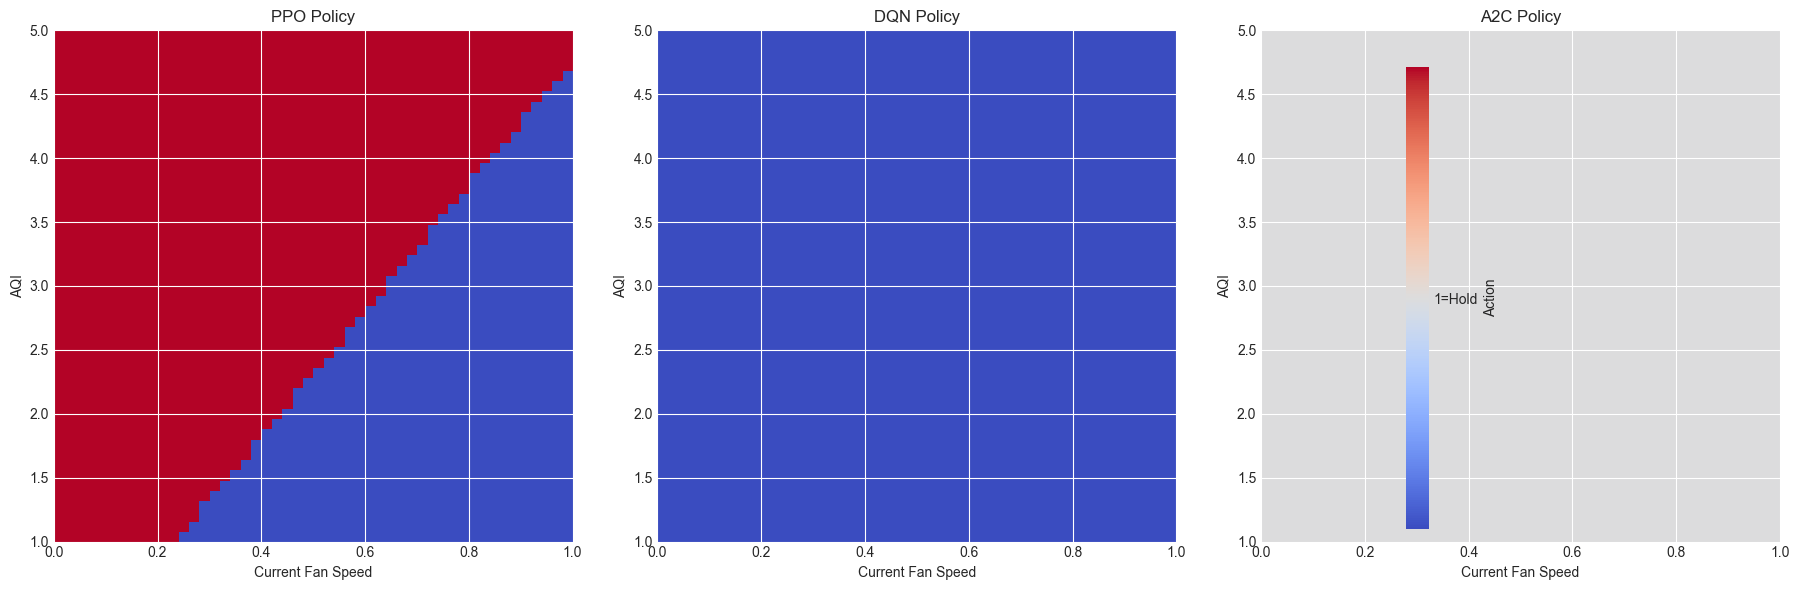

In [54]:


# Ranges
aqi_range = np.linspace(1, 5, 50)
speed_range = np.linspace(0, 1, 50)

# Action grids
action_grid_ppo = np.zeros((len(aqi_range), len(speed_range)))
action_grid_dqn = np.zeros((len(aqi_range), len(speed_range)))
action_grid_a2c = np.zeros((len(aqi_range), len(speed_range)))

# Fill grids
for i, aqi in enumerate(aqi_range):
    for j, speed in enumerate(speed_range):
        obs = np.array([aqi, speed], dtype=np.float32)

        # a_ppo, _ = model_ppo.predict(obs, deterministic=True)
        # a_dqn, _ = model_dqn.predict(obs, deterministic=True)
        # a_a2c, _ = model_a2c.predict(obs, deterministic=True)
        a_ppo, _ = model_ppo.predict(obs, deterministic=True)
        a_dqn, _ = model_dqn.predict(obs.reshape(1, -1), deterministic=True)
        a_a2c, _ = model_a2c.predict(obs.reshape(1, -1), deterministic=True)


        action_grid_ppo[i, j] = int(a_ppo)
        action_grid_dqn[i, j] = int(a_dqn)
        action_grid_a2c[i, j] = int(a_a2c)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
titles = ['PPO Policy', 'DQN Policy', 'A2C Policy']
grids = [action_grid_ppo, action_grid_dqn, action_grid_a2c]

for ax, grid, title in zip(axes, grids, titles):
    im = ax.imshow(grid, extent=[0, 1, 1, 5], aspect='auto', cmap='coolwarm', origin='lower')
    ax.set_title(title)
    ax.set_xlabel('Current Fan Speed')
    ax.set_ylabel('AQI')

# Shared colorbar
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['0=Decrease', '1=Hold', '2=Increase'])
cbar.set_label('Action')

plt.tight_layout()
plt.show()


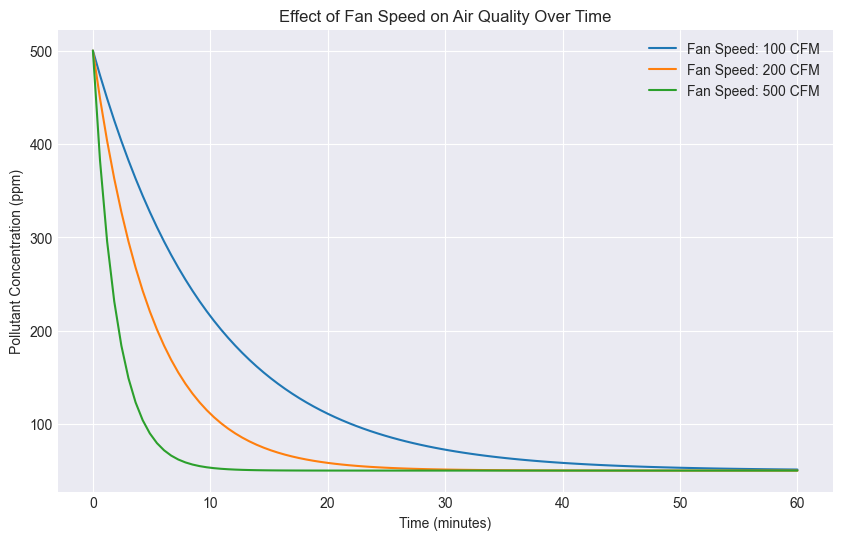

In [72]:
import numpy as np
import matplotlib.pyplot as plt

def air_quality_model(fan_speed, initial_pollution, room_volume, outdoor_air_quality, time):
    """
    Models air quality over time based on fan speed
    
    Parameters:
    - fan_speed: in CFM (cubic feet per minute) or similar unit
    - initial_pollution: initial concentration of pollutants (ppm or µg/m³)
    - room_volume: volume of the space (cubic feet or cubic meters)
    - outdoor_air_quality: background pollution level
    - time: array of time points to evaluate (minutes)
    
    Returns:
    - array of pollution concentrations over time
    """
    # Air exchange rate (how many room volumes per minute the fan moves)
    air_exchange_rate = fan_speed / room_volume
    
    pollution = np.zeros_like(time, dtype=float)
    pollution[0] = initial_pollution
    
    for i in range(1, len(time)):
        dt = time[i] - time[i-1]
        # Simple exponential decay model
        pollution[i] = outdoor_air_quality + (pollution[i-1] - outdoor_air_quality) * np.exp(-air_exchange_rate * dt)
    
    return pollution

# Example usage
room_volume = 1000  # cubic feet
fan_speeds = [100, 200, 500]  # CFM
initial_pollution = 500  # ppm
outdoor_air_quality = 50  # ppm
time = np.linspace(0, 60, 100)  # 60 minutes

plt.figure(figsize=(10, 6))
for speed in fan_speeds:
    pollution = air_quality_model(speed, initial_pollution, room_volume, outdoor_air_quality, time)
    plt.plot(time, pollution, label=f'Fan Speed: {speed} CFM')

plt.xlabel('Time (minutes)')
plt.ylabel('Pollutant Concentration (ppm)')
plt.title('Effect of Fan Speed on Air Quality Over Time')
plt.legend()
plt.grid(True)
plt.show()

Step:    1 | AQI: 3.16 | Fan: 0.33 (6116 RPM) | Power: 109.8W
Step:    2 | AQI: 3.13 | Fan: 0.33 (6116 RPM) | Power: 109.8W
Step:    3 | AQI: 3.06 | Fan: 0.43 (7991 RPM) | Power: 95.2W
Step:    4 | AQI: 2.99 | Fan: 0.43 (7991 RPM) | Power: 95.2W
Step:    5 | AQI: 3.05 | Fan: 0.43 (7991 RPM) | Power: 95.2W
Step:    6 | AQI: 3.05 | Fan: 0.33 (6116 RPM) | Power: 109.8W
Step:    7 | AQI: 3.04 | Fan: 0.23 (4241 RPM) | Power: 124.4W
Step:    8 | AQI: 3.03 | Fan: 0.33 (6116 RPM) | Power: 109.8W
Step:    9 | AQI: 3.05 | Fan: 0.23 (4241 RPM) | Power: 124.4W
Step:   10 | AQI: 2.95 | Fan: 0.23 (4241 RPM) | Power: 124.4W
Step:   11 | AQI: 2.91 | Fan: 0.23 (4241 RPM) | Power: 124.4W
Step:   12 | AQI: 2.87 | Fan: 0.13 (2366 RPM) | Power: 139.0W
Step:   13 | AQI: 2.81 | Fan: 0.23 (4241 RPM) | Power: 124.4W
Step:   14 | AQI: 2.80 | Fan: 0.23 (4241 RPM) | Power: 124.4W
Step:   15 | AQI: 2.74 | Fan: 0.23 (4241 RPM) | Power: 124.4W
Step:   16 | AQI: 2.70 | Fan: 0.33 (6116 RPM) | Power: 109.8W
Step:   17 